In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import networkx as nx
from networkx.algorithms import community

# Load the Data

In [50]:
ego_alter_profiles = pd.read_csv("Data/EgoAlterProfiles.txt", sep = '\t')

In [51]:
# I would consider only them
#ego_alter_profiles=ego_alter_profiles[ ego_alter_profiles['IsEgo']==True ]


ego_alter_profiles['lang'] = ego_alter_profiles['lang'].str.lower()
languages_count = ego_alter_profiles.groupby('lang')['ID'].count().reset_index(name = 'count')
# I decreased this to a hundred
small_language = languages_count[languages_count['count'] < 100]['lang'].to_list()

languages = ego_alter_profiles[ ~ego_alter_profiles['lang'].isin(small_language) ].reset_index(drop = True)
languages = languages[['ID','IsEgo', 'followers_count', 'friends_count', 'statuses_count', 'lang']]
languages = languages.dropna()

western_language = ['cs', 'fi', 'sv', 'pl', 'da', 'ru', 'fr', 'ca', 'nl', 'de', 'pt', 'it', 'es', 'en-gb', 'en']
eastern_language = ['ar', 'id', 'tr', 'zh-tw', 'zh-cn', 'ja', 'th', 'ko', 'fil', 'msa']

def classify_lang(lang):
    if lang in western_language:
        return 'West'
    if lang in eastern_language:
        return 'East'

languages['area'] = languages['lang'].apply(classify_lang)
languages.head()

ID  IsEgo  followers_count  friends_count  statuses_count lang  area
0   1   True             30.0             28             9.0   en  West
1   2   True              2.0              8             7.0   en  West
2   3   True              1.0              0             0.0   fr  West
3   4   True              3.0              3            68.0   en  West
4   5   True             65.0            118           748.0   fr  West

In [52]:
languages_stat = (languages.groupby('lang')[['followers_count', 'friends_count', 'statuses_count']]
.mean()
.reset_index())

languages_count_dict = dict(zip(languages_count['lang'], languages_count['count']))

def add_count(lang):
    return languages_count_dict[lang]

languages_stat['user_count'] = languages_stat['lang'].apply(add_count)
languages_stat['area'] = languages_stat['lang'].apply(classify_lang)
languages_stat.set_index('lang', inplace = True)
languages_stat.sort_values(by = 'user_count', inplace = True)

languages_stat.head()

followers_count  friends_count  statuses_count  user_count  area
lang                                                                  
ms         216.841121     607.224299      157.280374         107  None
eu        2788.274336     528.212389     6077.823009         113  None
in          76.358974     282.136752       79.068376         117  None
gl        3279.110390     740.740260     8105.311688         154  None
fa        3342.702041     734.077551     3118.240816         245  None

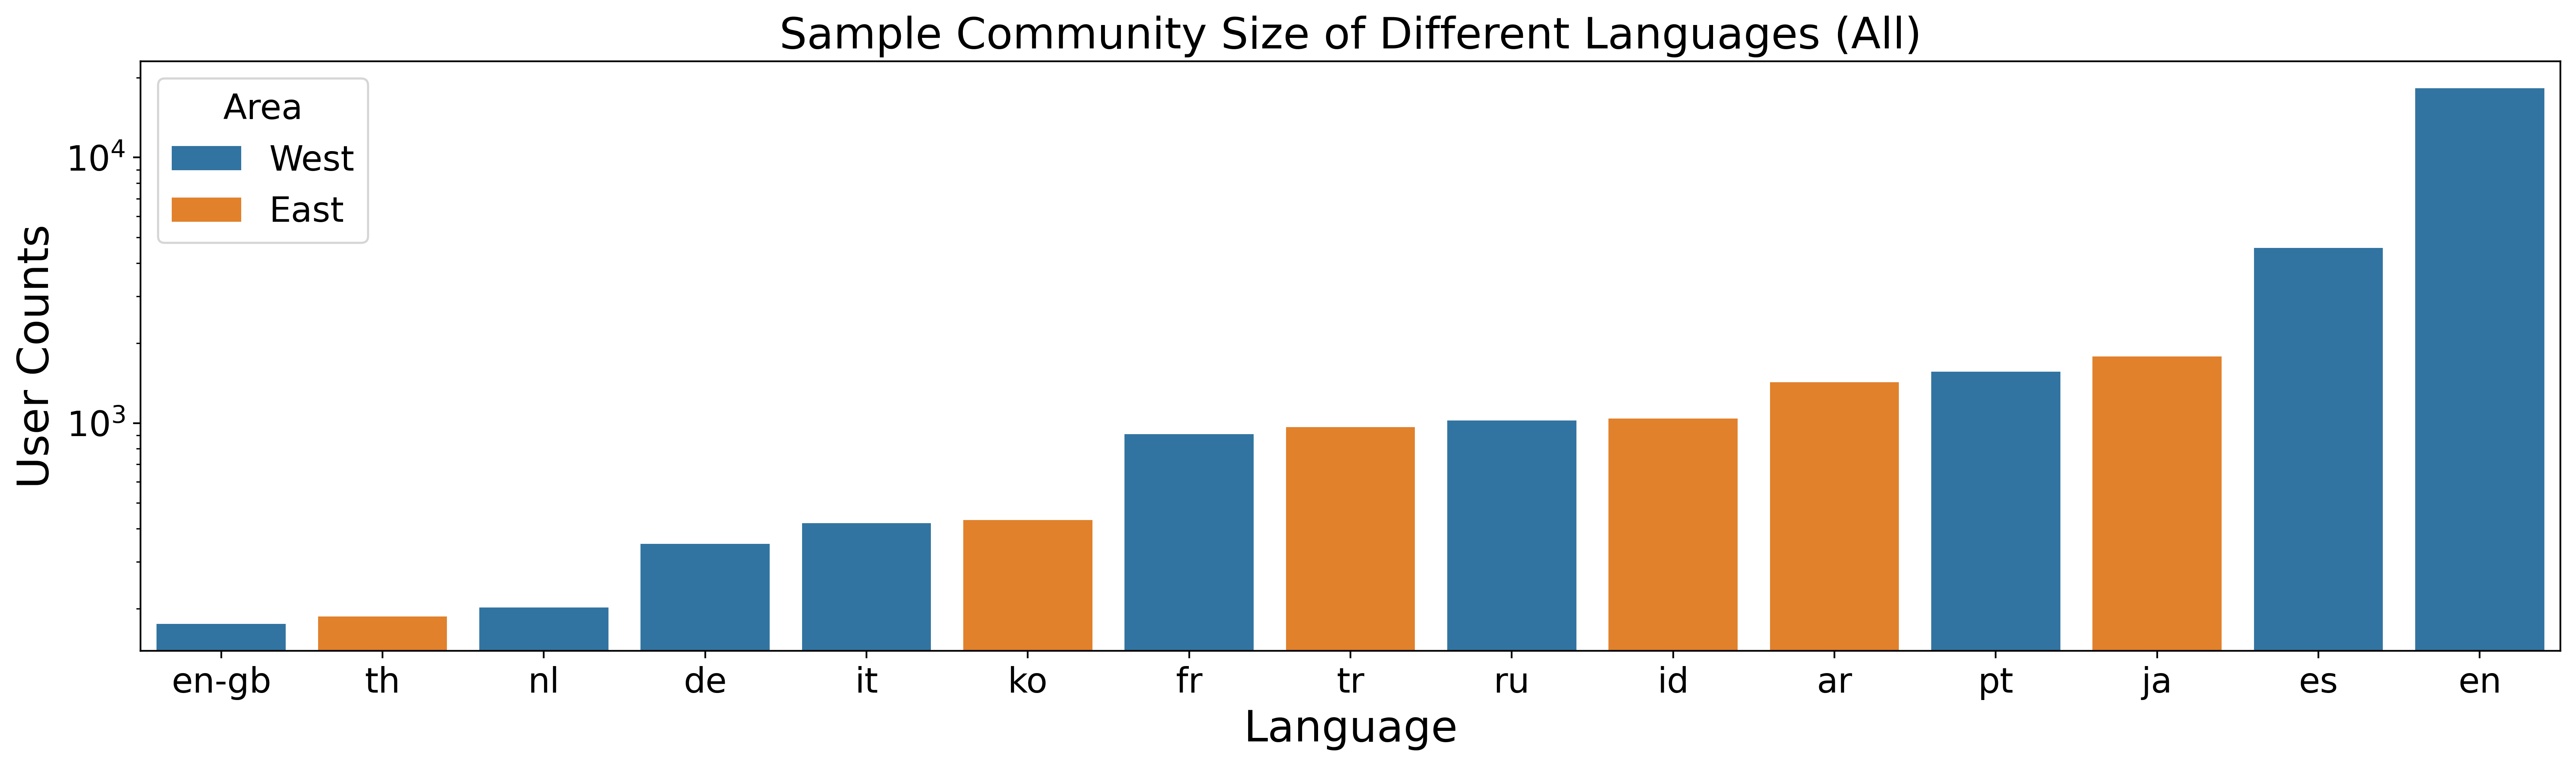

In [36]:
fig, ax = plt.subplots(figsize = (20, 5), dpi = 400)

ax.set(yscale = 'log')
sns.barplot(x = languages_stat.index, y = languages_stat['user_count'], hue = languages_stat['area'], ax = ax,
           dodge = False)
ax.set_xlabel('Language', fontsize = 20)
ax.set_ylabel('User Counts', fontsize = 20)
ax.set_title('Sample Community Size of Different Languages (All)', fontsize=20)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
plt.legend(title="Area", fontsize=16, title_fontsize=16)

plt.show()

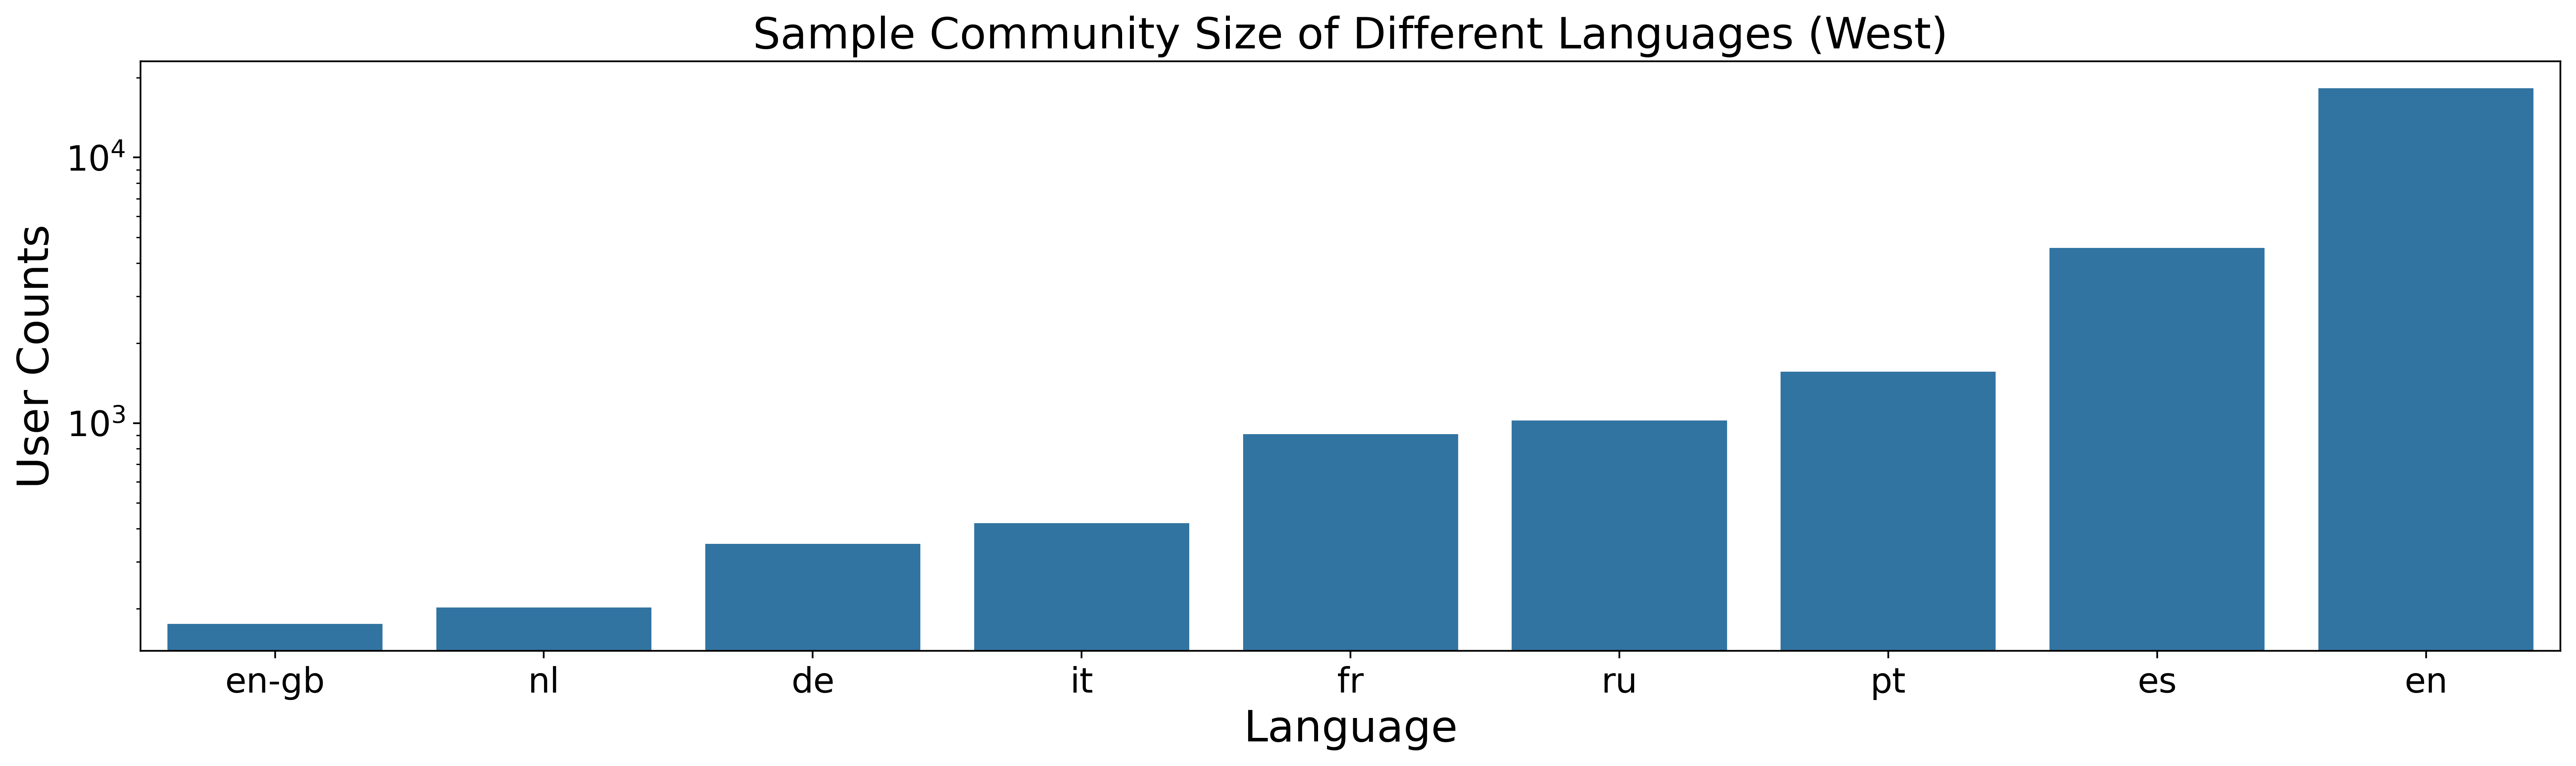

In [37]:
fig, ax = plt.subplots(figsize = (20, 5), dpi = 400)

languages_stat_west = languages_stat[languages_stat['area']=='West']

ax.set(yscale = 'log')
sns.barplot(x = languages_stat_west.index, y = languages_stat_west['user_count'], 
            color = sns.color_palette()[0], ax = ax, dodge = False)
ax.set_xlabel('Language', fontsize = 20)
ax.set_ylabel('User Counts', fontsize = 20)
ax.set_title('Sample Community Size of Different Languages (West)', fontsize=20)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

plt.show()

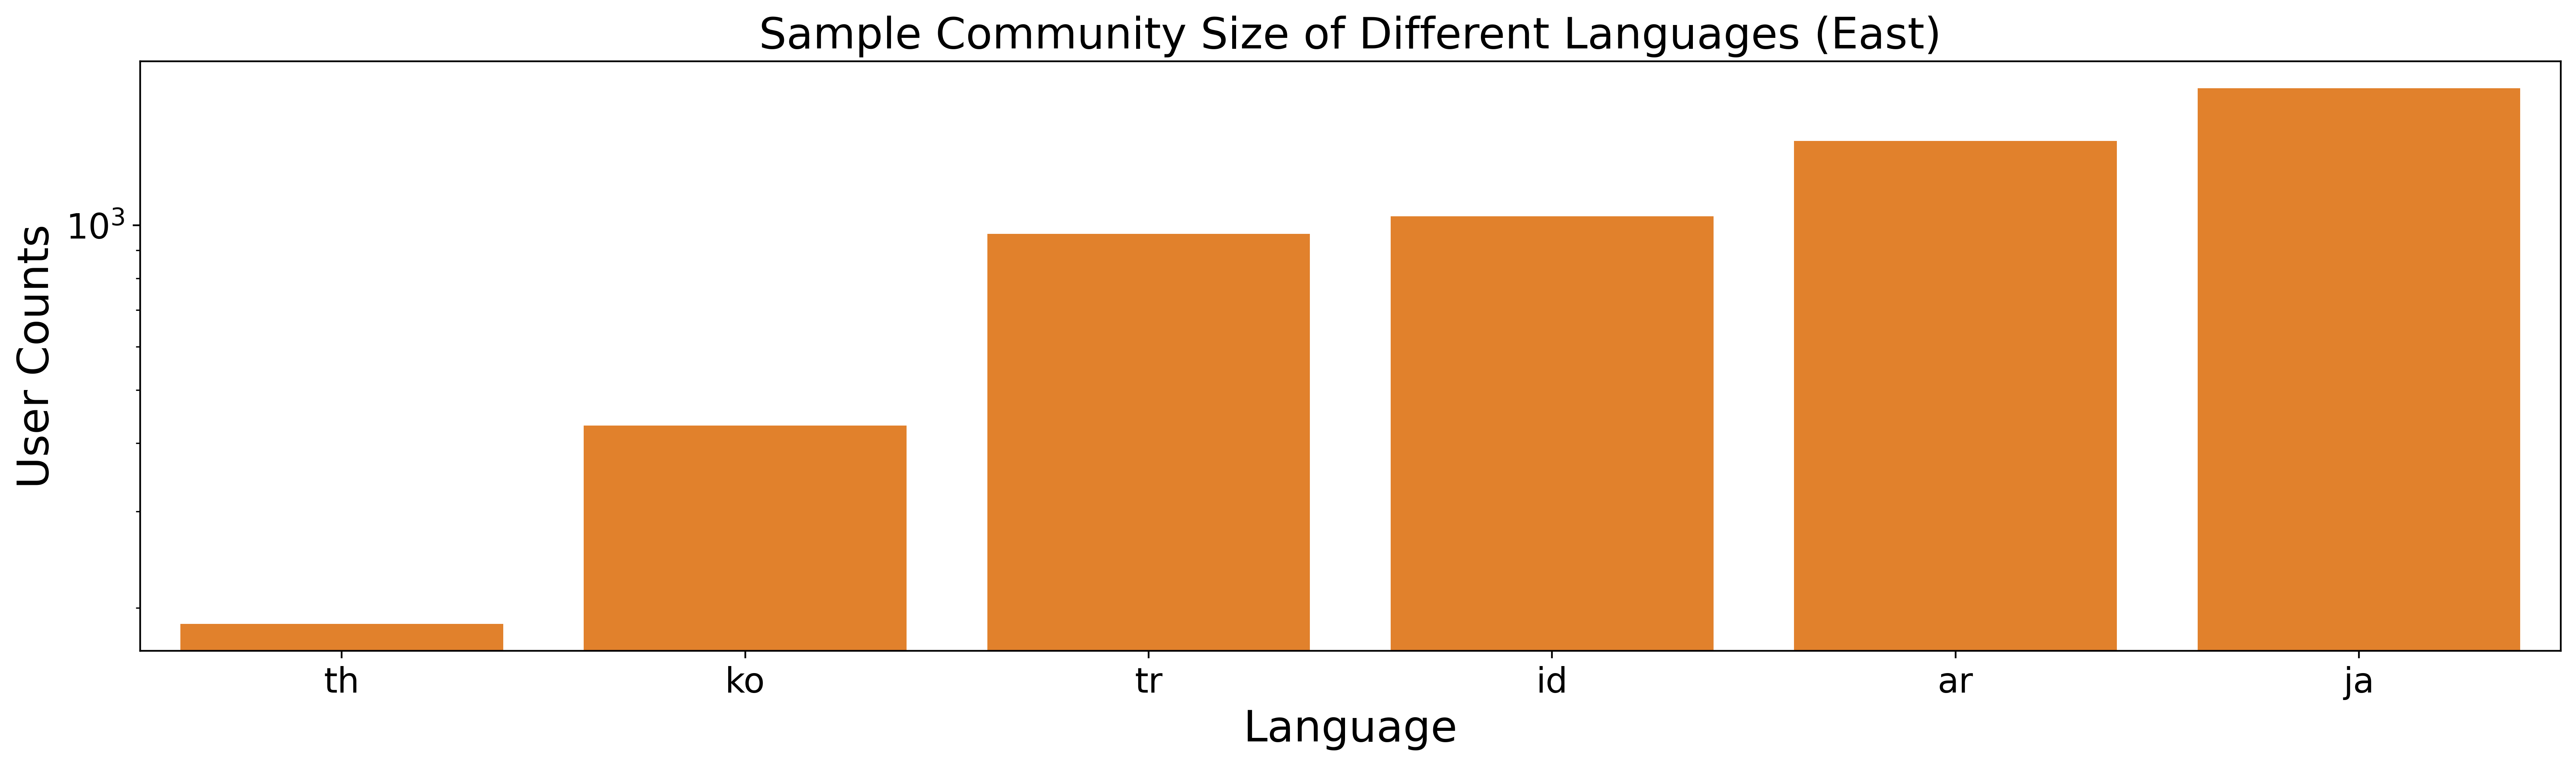

In [38]:
fig, ax = plt.subplots(figsize = (20, 5), dpi = 400)

languages_stat_east = languages_stat[languages_stat['area']=='East']

ax.set(yscale = 'log')
sns.barplot(x = languages_stat_east.index, y = languages_stat_east['user_count'], 
            color = sns.color_palette()[1], ax = ax, dodge = False)
ax.set_xlabel('Language', fontsize = 20)
ax.set_ylabel('User Counts', fontsize = 20)
ax.set_title('Sample Community Size of Different Languages (East)', fontsize=20)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

plt.show()

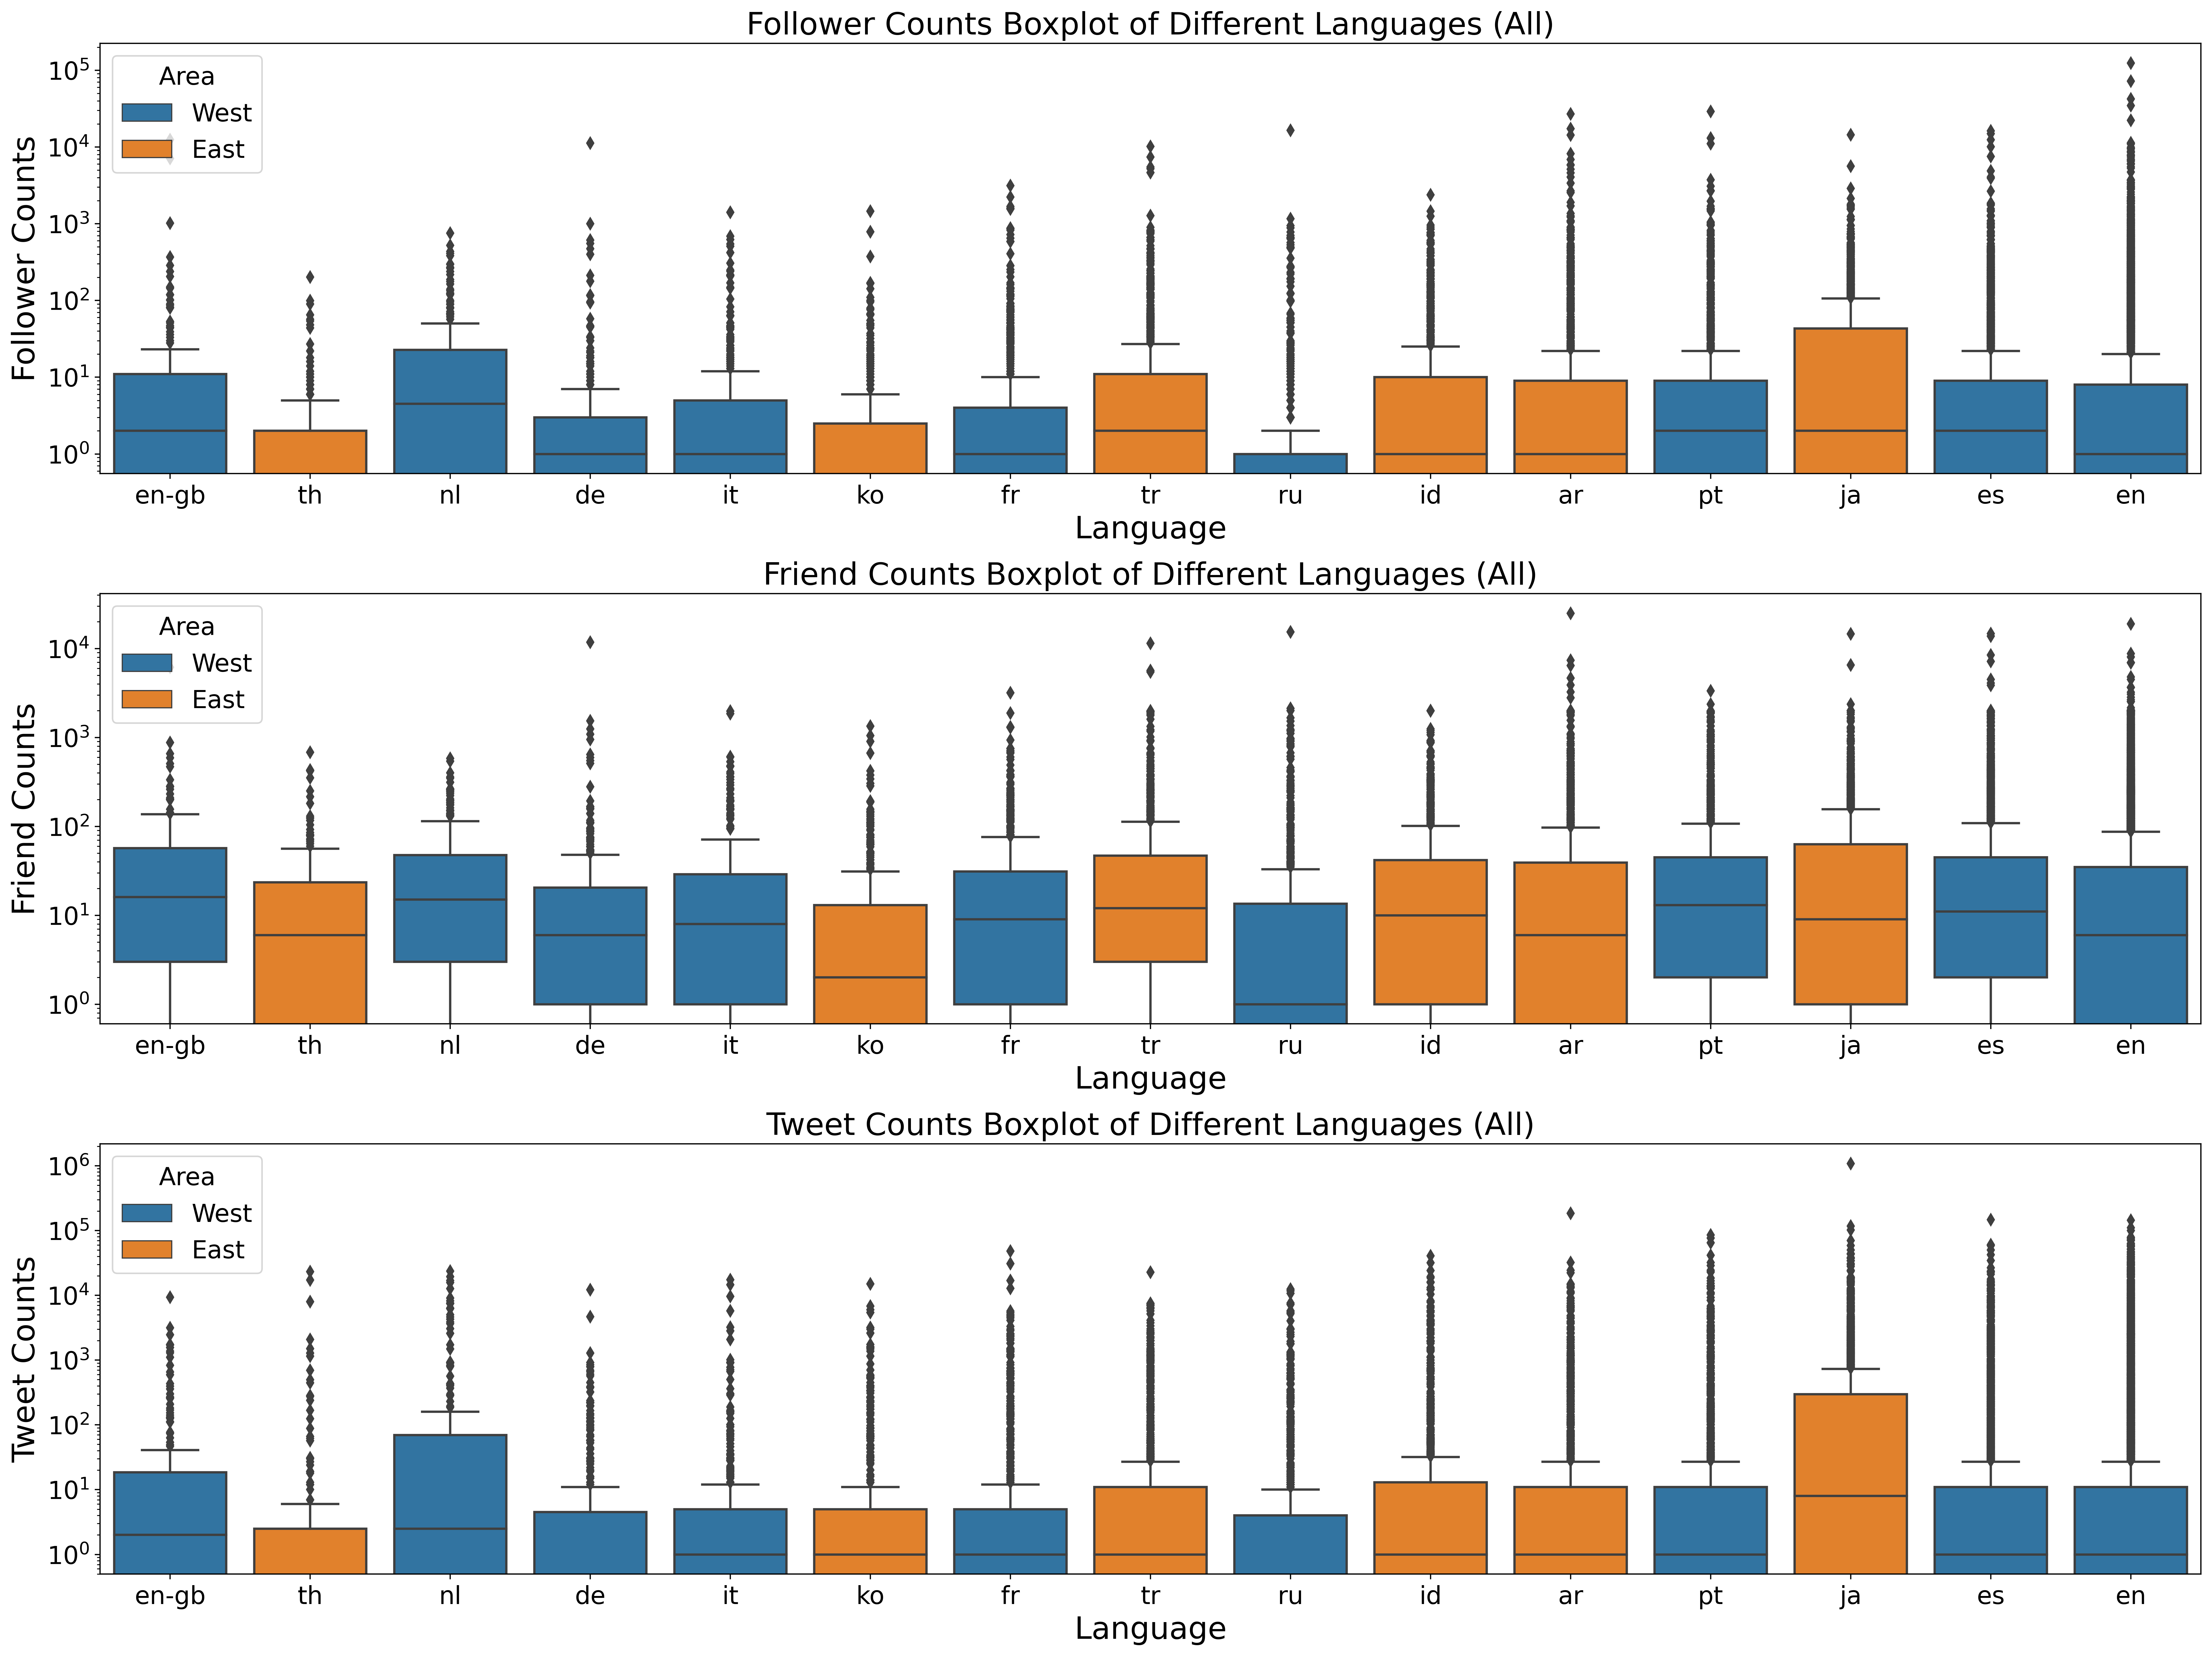

In [39]:
language_order = languages_stat.index.tolist()

fig, ax = plt.subplots(3, 1, figsize = (20, 15), dpi = 400)

ax[0].set(yscale="log")
sns.boxplot(x = 'lang', y = 'followers_count', data = languages, order = language_order, ax = ax[0],
           hue = 'area', dodge = False)
ax[0].set_xlabel('Language', fontsize = 20)
ax[0].set_ylabel('Follower Counts', fontsize = 20)
ax[0].set_title('Follower Counts Boxplot of Different Languages (All)', fontsize=20)
ax[0].xaxis.set_tick_params(labelsize=16)
ax[0].yaxis.set_tick_params(labelsize=16)
ax[0].legend(title="Area", fontsize=16, title_fontsize=16, loc = 2)

ax[1].set(yscale="log")
sns.boxplot(x = 'lang', y = 'friends_count', data = languages, order = language_order, ax = ax[1],
           hue = 'area', dodge = False)
ax[1].set_xlabel('Language', fontsize = 20)
ax[1].set_ylabel('Friend Counts', fontsize = 20)
ax[1].set_title('Friend Counts Boxplot of Different Languages (All)', fontsize=20)
ax[1].xaxis.set_tick_params(labelsize=16)
ax[1].yaxis.set_tick_params(labelsize=16)
ax[1].legend(title="Area", fontsize=16, title_fontsize=16, loc = 2)

ax[2].set(yscale="log")
sns.boxplot(x = 'lang', y = 'statuses_count', data = languages, order = language_order, ax = ax[2],
           hue = 'area', dodge = False)
ax[2].set_xlabel('Language', fontsize = 20)
ax[2].set_ylabel('Tweet Counts', fontsize = 20)
ax[2].set_title('Tweet Counts Boxplot of Different Languages (All)', fontsize=20)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=16)
ax[2].legend(title="Area", fontsize=16, title_fontsize=16, loc = 2)

fig.tight_layout()
plt.show()

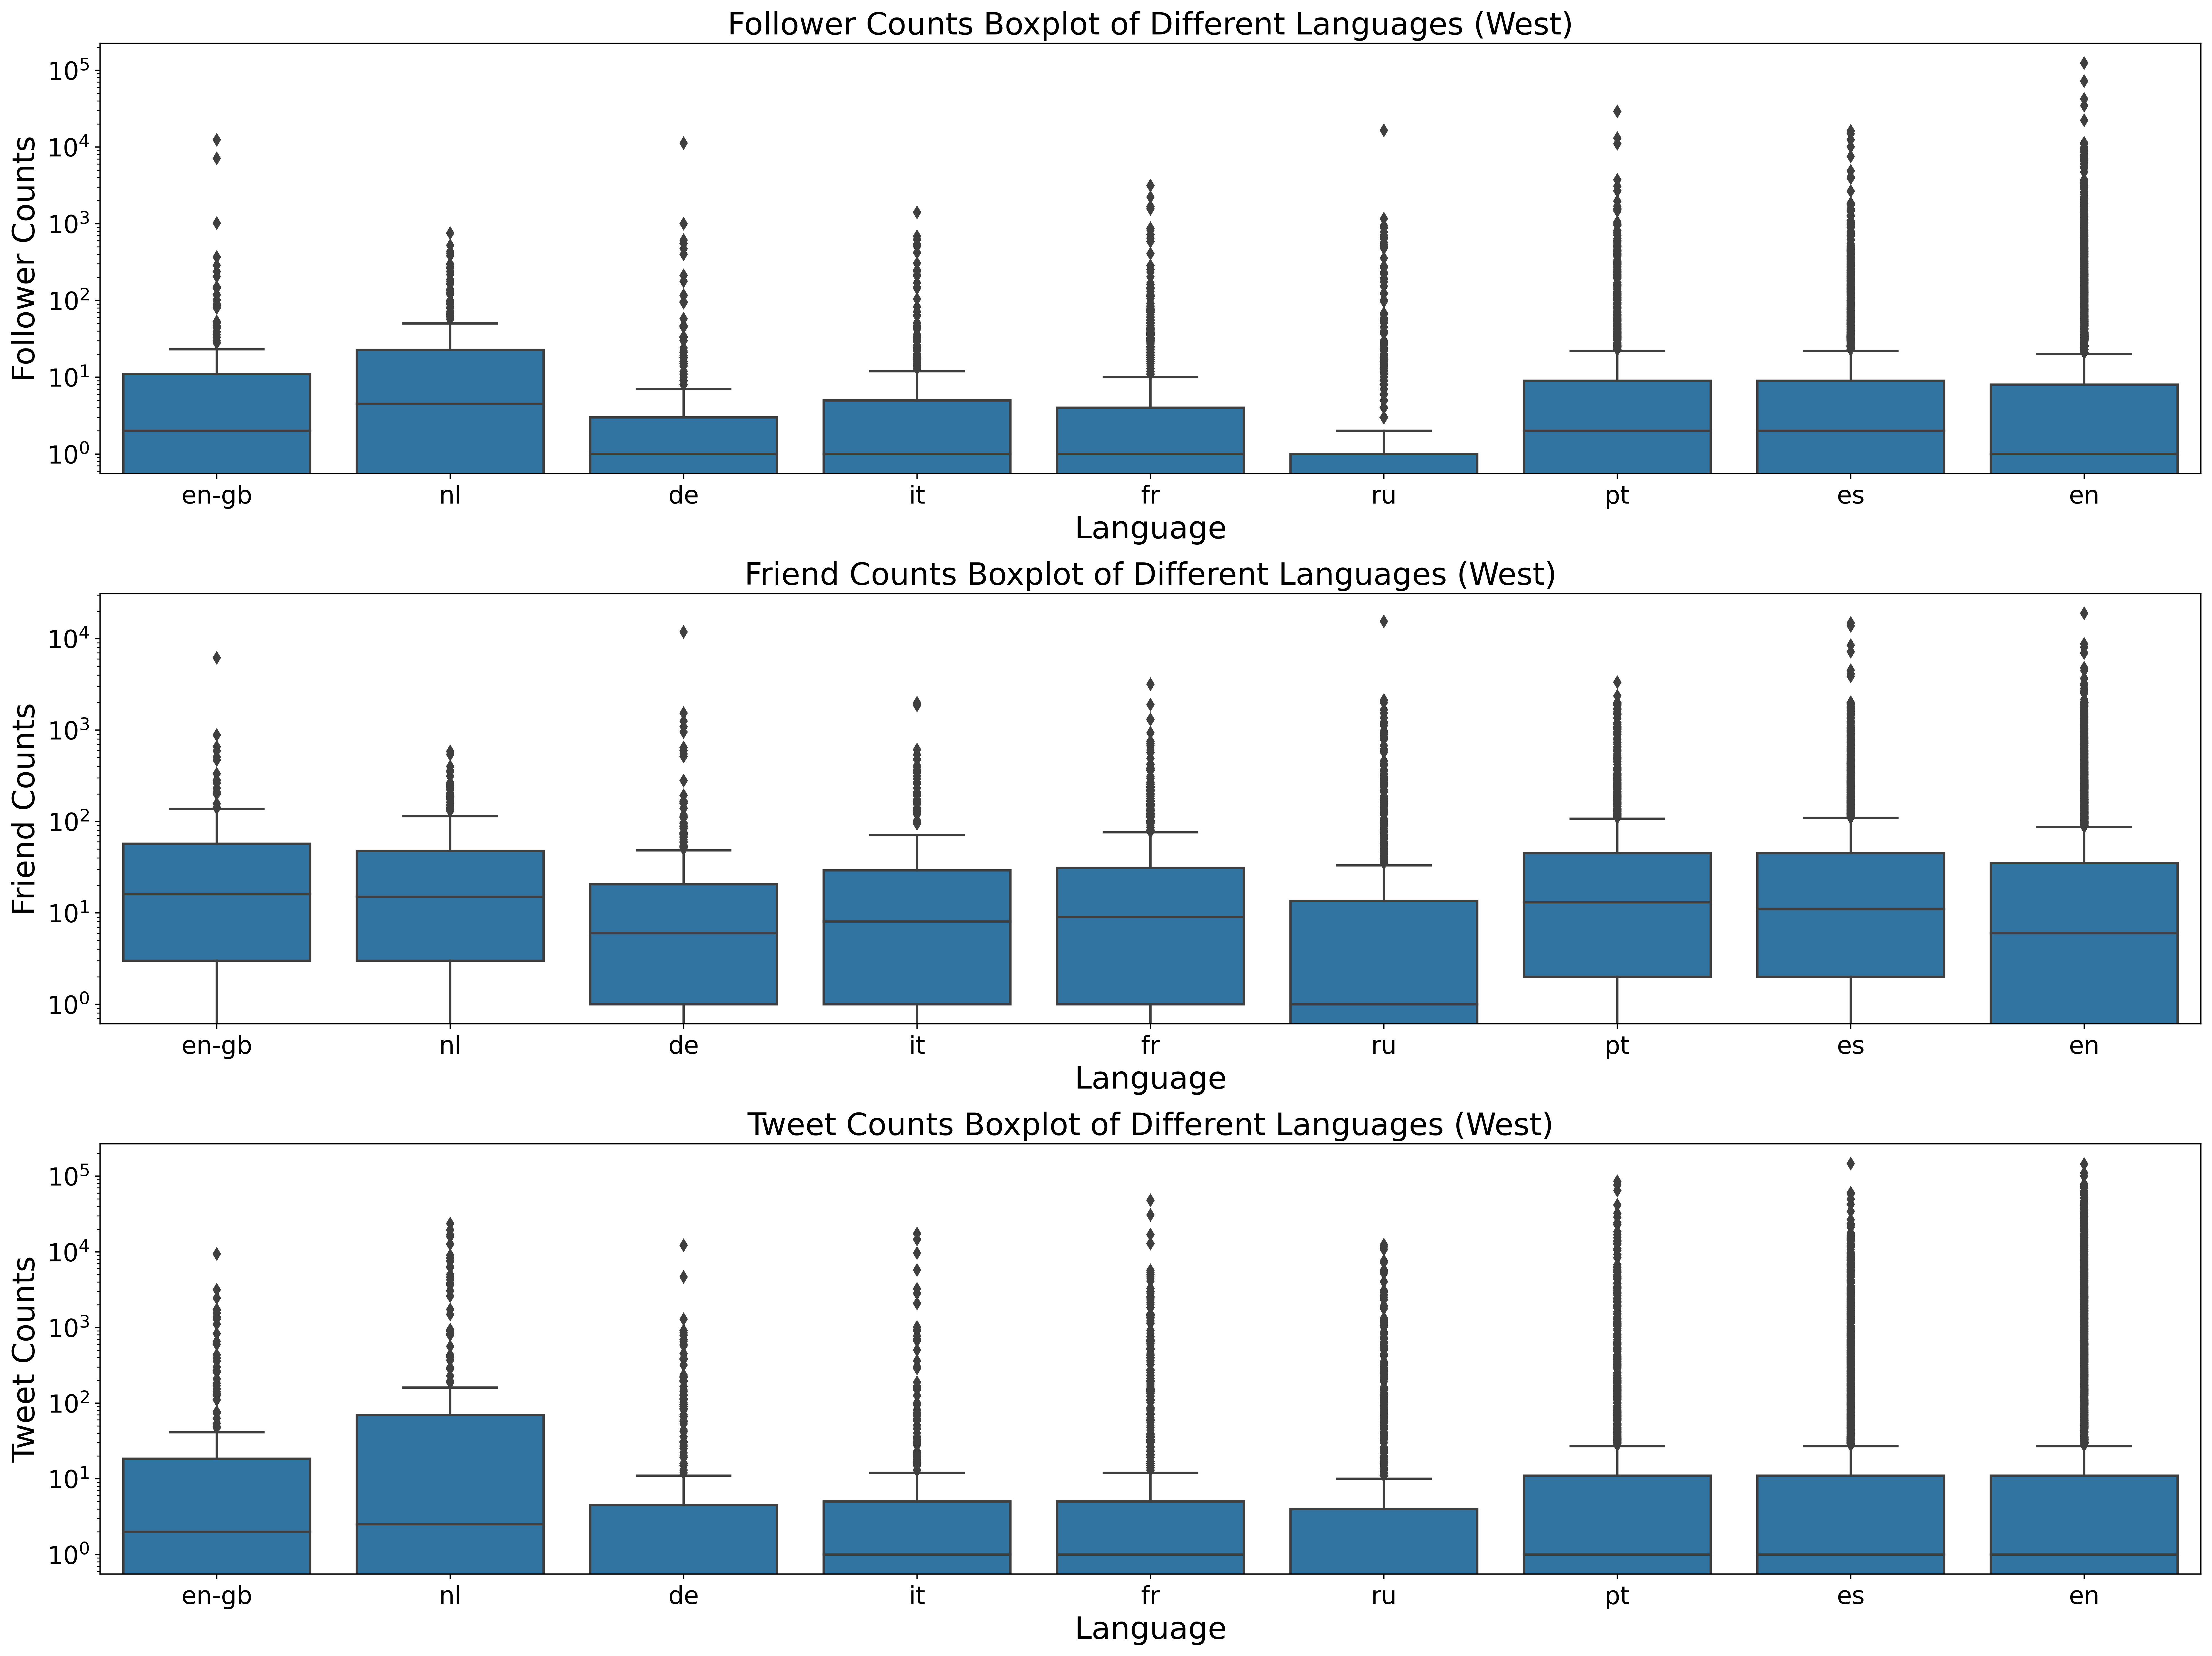

In [40]:
languages_west = languages[languages['area'] == 'West']
language_order = languages_stat_west.index.tolist()

fig, ax = plt.subplots(3, 1, figsize = (20, 15), dpi = 400)

ax[0].set(yscale="log")
sns.boxplot(x = 'lang', y = 'followers_count', data = languages_west, order = language_order, ax = ax[0],
            dodge = False, color = sns.color_palette()[0])
ax[0].set_xlabel('Language', fontsize = 20)
ax[0].set_ylabel('Follower Counts', fontsize = 20)
ax[0].set_title('Follower Counts Boxplot of Different Languages (West)', fontsize=20)
ax[0].xaxis.set_tick_params(labelsize=16)
ax[0].yaxis.set_tick_params(labelsize=16)

ax[1].set(yscale="log")
sns.boxplot(x = 'lang', y = 'friends_count', data = languages_west, order = language_order, ax = ax[1],
           dodge = False, color = sns.color_palette()[0])
ax[1].set_xlabel('Language', fontsize = 20)
ax[1].set_ylabel('Friend Counts', fontsize = 20)
ax[1].set_title('Friend Counts Boxplot of Different Languages (West)', fontsize=20)
ax[1].xaxis.set_tick_params(labelsize=16)
ax[1].yaxis.set_tick_params(labelsize=16)

ax[2].set(yscale="log")
sns.boxplot(x = 'lang', y = 'statuses_count', data = languages_west, order = language_order, ax = ax[2],
           dodge = False, color = sns.color_palette()[0])
ax[2].set_xlabel('Language', fontsize = 20)
ax[2].set_ylabel('Tweet Counts', fontsize = 20)
ax[2].set_title('Tweet Counts Boxplot of Different Languages (West)', fontsize=20)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=16)

fig.tight_layout()
plt.show()

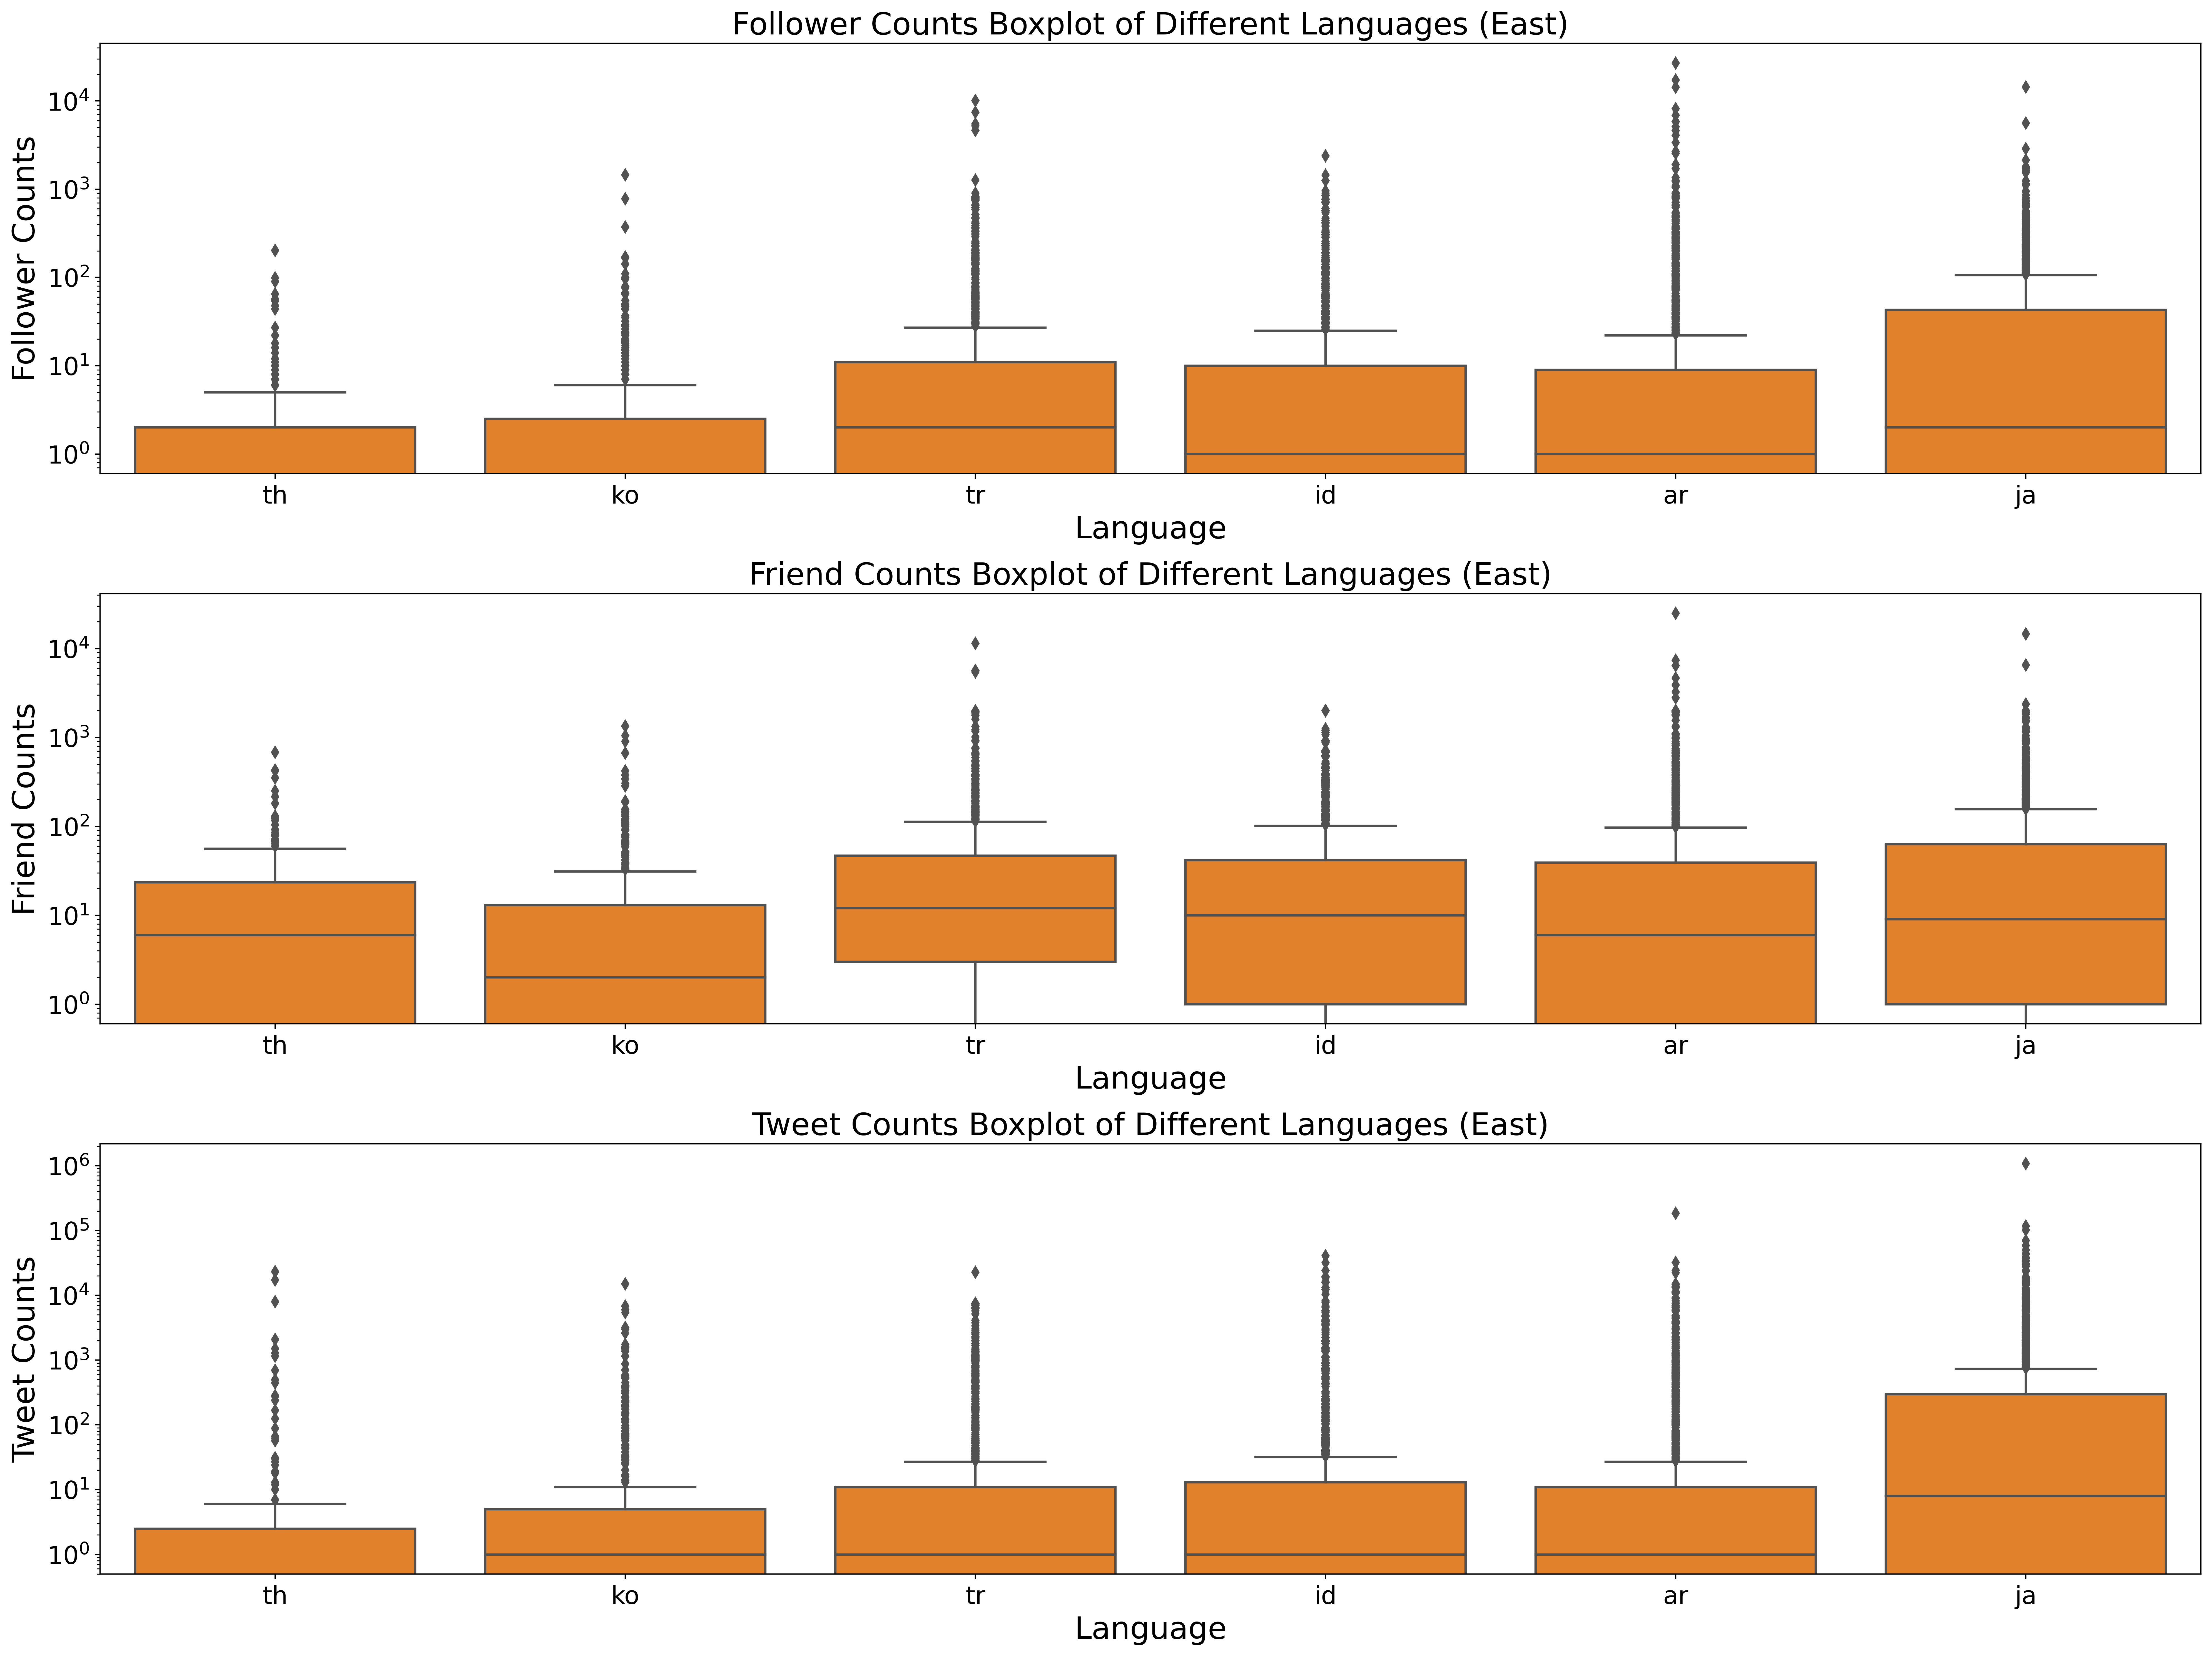

In [41]:
languages_east = languages[languages['area'] == 'East']
language_order = languages_stat_east.index.tolist()

fig, ax = plt.subplots(3, 1, figsize = (20, 15), dpi = 400)

ax[0].set(yscale="log")
sns.boxplot(x = 'lang', y = 'followers_count', data = languages_east, order = language_order, ax = ax[0],
           dodge = False, color = sns.color_palette()[1])
ax[0].set_xlabel('Language', fontsize = 20)
ax[0].set_ylabel('Follower Counts', fontsize = 20)
ax[0].set_title('Follower Counts Boxplot of Different Languages (East)', fontsize=20)
ax[0].xaxis.set_tick_params(labelsize=16)
ax[0].yaxis.set_tick_params(labelsize=16)

ax[1].set(yscale="log")
sns.boxplot(x = 'lang', y = 'friends_count', data = languages_east, order = language_order, ax = ax[1],
           dodge = False, color = sns.color_palette()[1])
ax[1].set_xlabel('Language', fontsize = 20)
ax[1].set_ylabel('Friend Counts', fontsize = 20)
ax[1].set_title('Friend Counts Boxplot of Different Languages (East)', fontsize=20)
ax[1].xaxis.set_tick_params(labelsize=16)
ax[1].yaxis.set_tick_params(labelsize=16)

ax[2].set(yscale="log")
sns.boxplot(x = 'lang', y = 'statuses_count', data = languages_east, order = language_order, ax = ax[2],
           dodge = False, color = sns.color_palette()[1])
ax[2].set_xlabel('Language', fontsize = 20)
ax[2].set_ylabel('Tweet Counts', fontsize = 20)
ax[2].set_title('Tweet Counts Boxplot of Different Languages (East)', fontsize=20)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=16)

fig.tight_layout()
plt.show()

0.08188169974584418
0.08164986987448364
0.048256357545244516


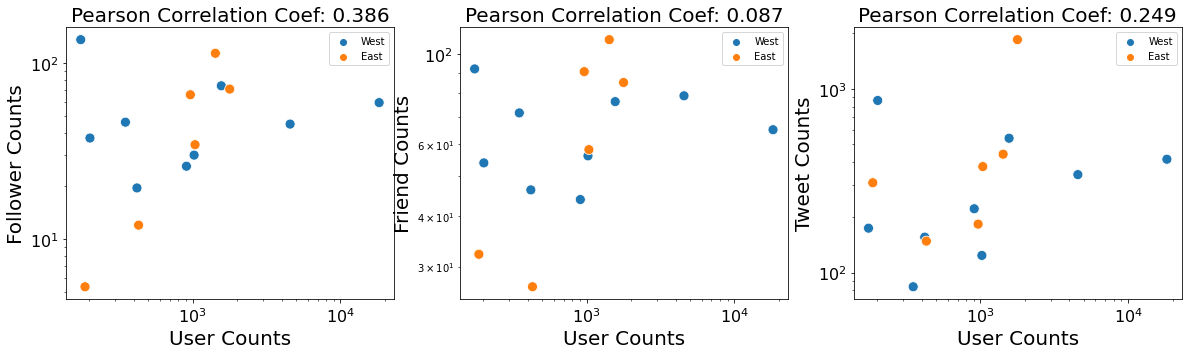

In [42]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))

ax[0].set(xscale="log", yscale='log')
sns.scatterplot(x = 'user_count', y = 'followers_count', hue=languages_stat.area.tolist(),
                data = languages_stat, ax = ax[0], s=100)
ax[0].set_xlabel('User Counts', fontsize = 20)
ax[0].set_ylabel('Follower Counts', fontsize = 20)
ax[0].set_title('Pearson Correlation Coef: 0.386', fontsize=20)
ax[0].xaxis.set_tick_params(labelsize=16)
ax[0].yaxis.set_tick_params(labelsize=16)

ax[1].set(xscale="log", yscale='log')
sns.scatterplot(x = 'user_count', y = 'friends_count', hue=languages_stat.area.tolist(),
                data = languages_stat, ax = ax[1], s = 100)
ax[1].set_xlabel('User Counts', fontsize = 20)
ax[1].set_ylabel('Friend Counts', fontsize = 20)
ax[1].set_title('Pearson Correlation Coef: 0.087', fontsize=20)
ax[1].xaxis.set_tick_params(labelsize=16)
ax[1].yaxis.set_tick_params(labelsize=16)

ax[2].set(xscale="log", yscale='log')
sns.scatterplot(x = 'user_count', y = 'statuses_count', hue=languages_stat.area.tolist(), 
                data = languages_stat, ax = ax[2], s=100)
ax[2].set_xlabel('User Counts', fontsize = 20)
ax[2].set_ylabel('Tweet Counts', fontsize = 20)
ax[2].set_title('Pearson Correlation Coef: 0.249', fontsize=20)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=16)

print(languages_stat['user_count'].corr(languages_stat['followers_count']))
print(languages_stat['user_count'].corr(languages_stat['friends_count']))
print(languages_stat['user_count'].corr(languages_stat['statuses_count']))

In [43]:
languages.groupby('area')[['followers_count', 'friends_count', 'statuses_count']].mean().reset_index()

area  followers_count  friends_count  statuses_count
0  East        67.785653      80.855157      791.880556
1  West        55.424750      66.884513      385.208371

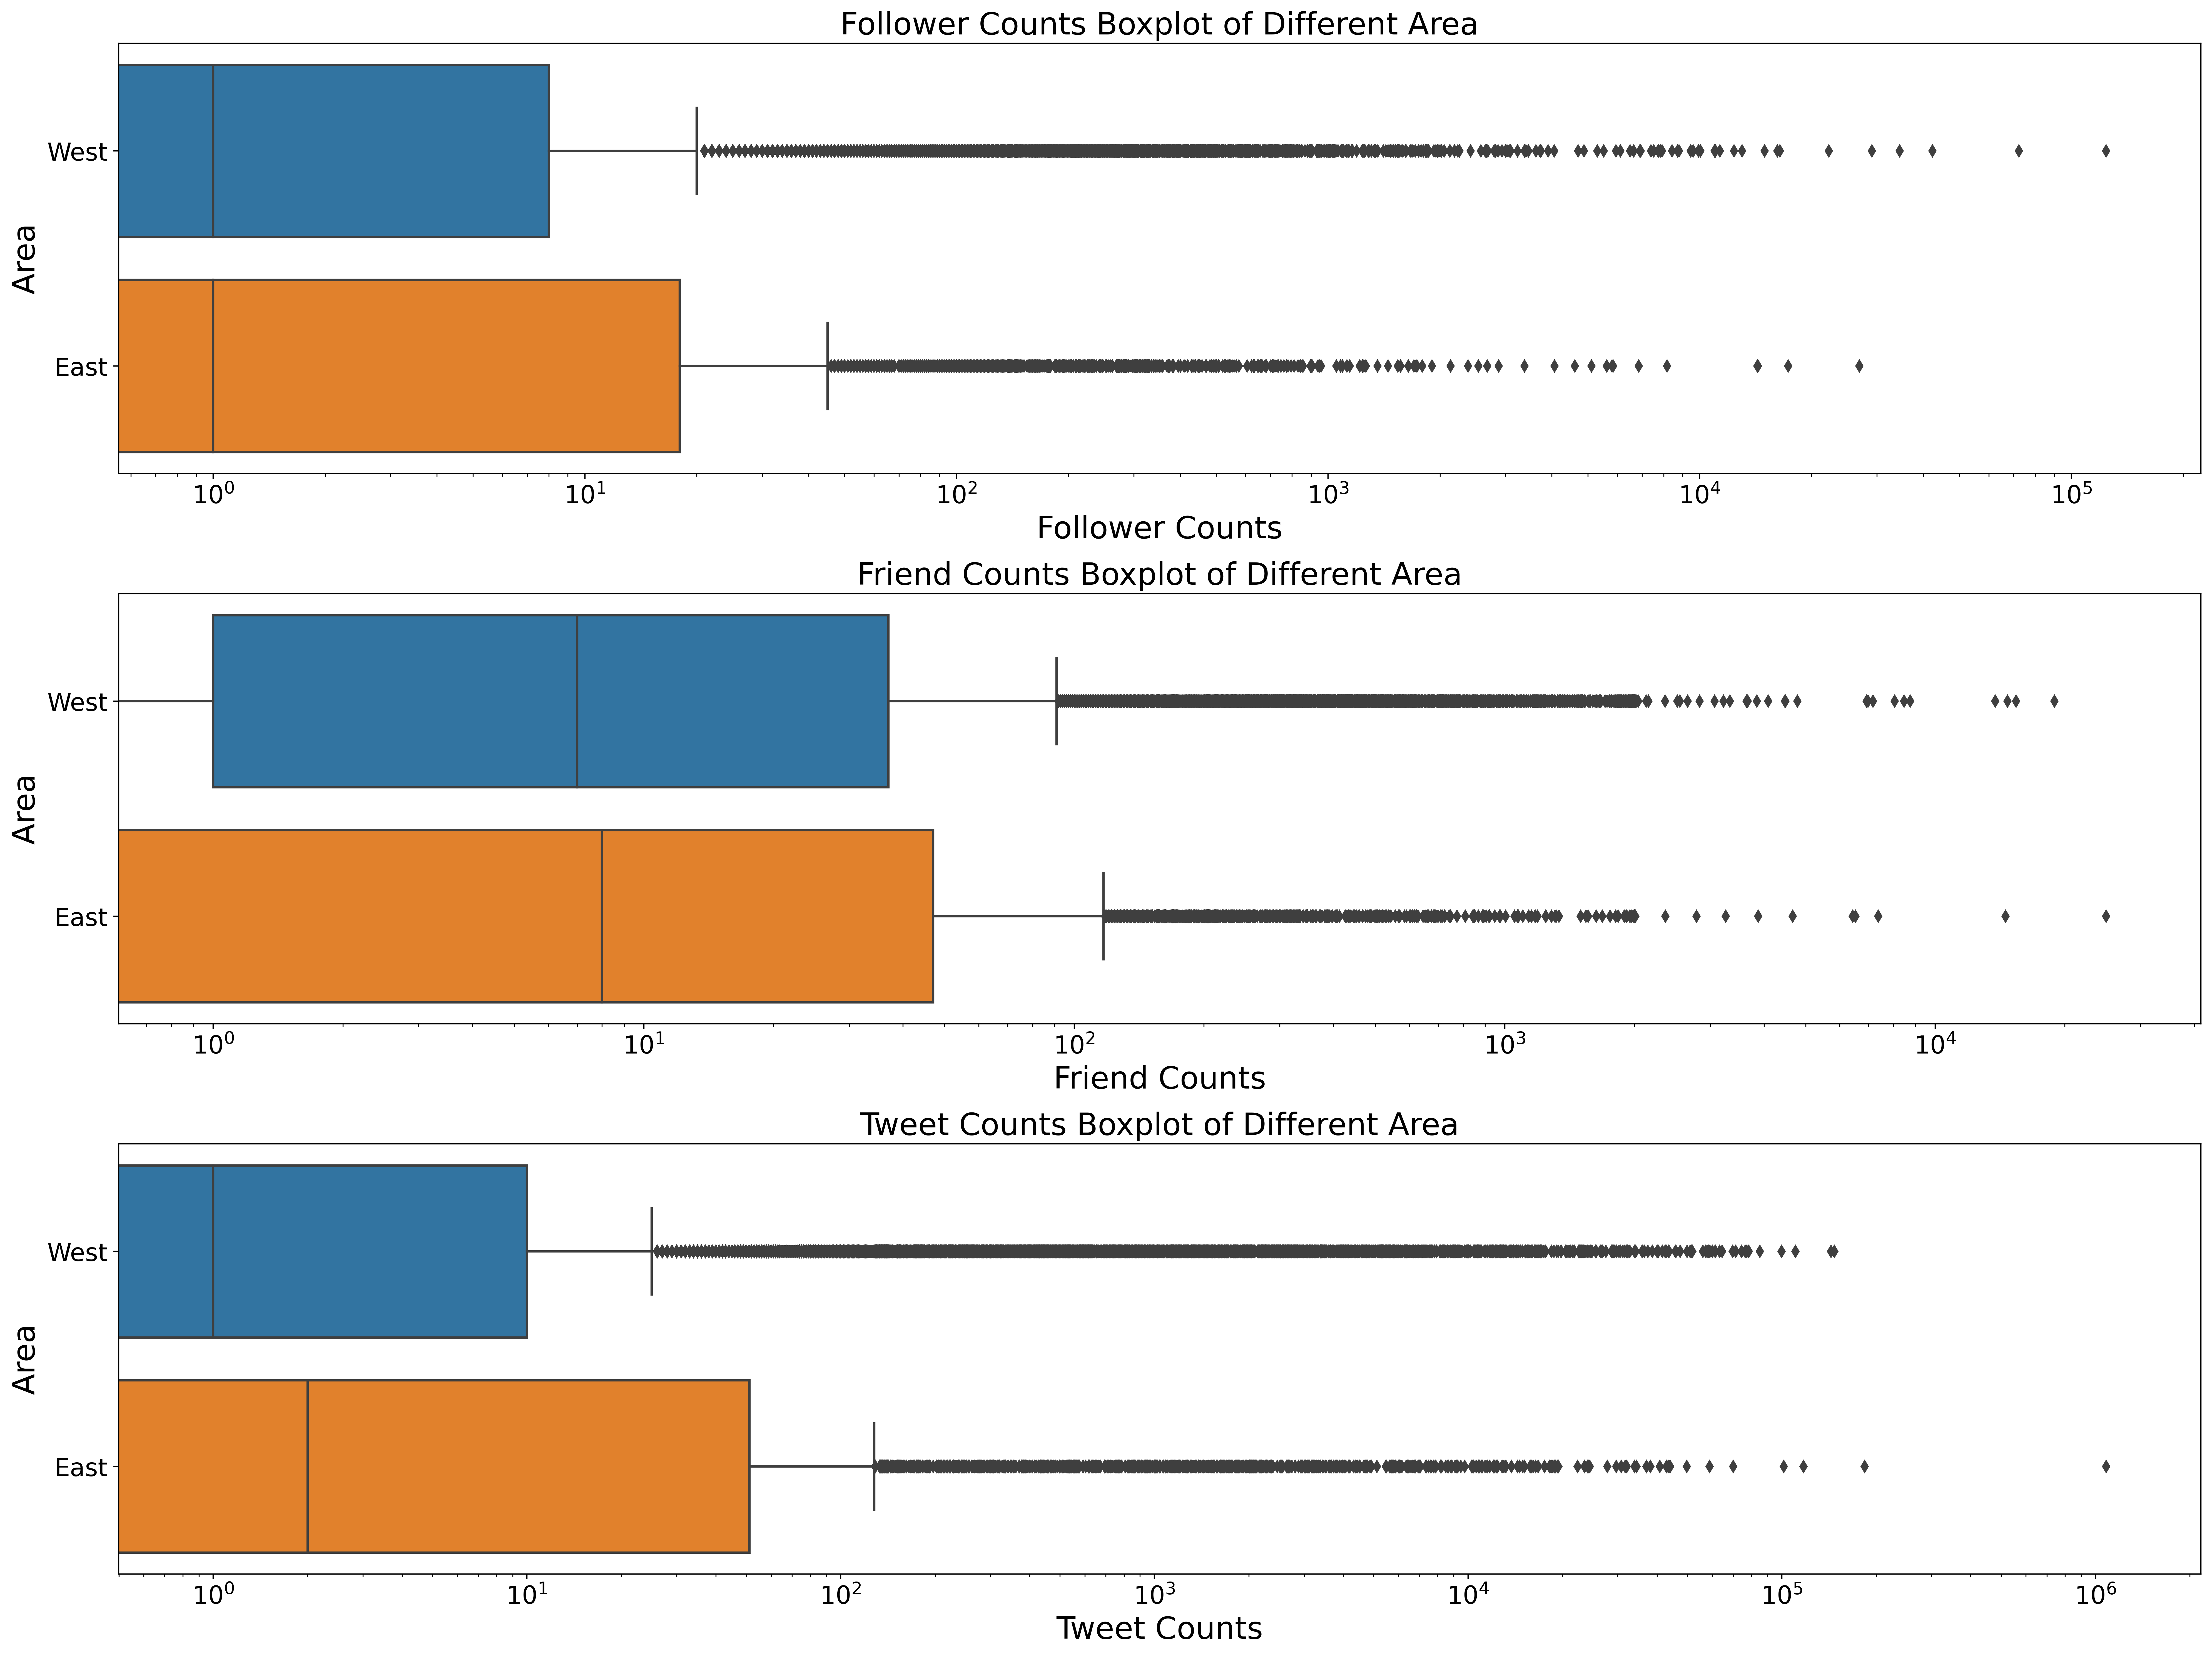

In [13]:
fig, ax = plt.subplots(3, 1, figsize = (20, 15), dpi = 400)

ax[0].set(xscale="log")
sns.boxplot( x = 'followers_count', y = 'area', data = languages, ax = ax[0])
ax[0].set_xlabel('Follower Counts', fontsize = 20)
ax[0].set_ylabel('Area', fontsize = 20)
ax[0].set_title('Follower Counts Boxplot of Different Area', fontsize=20)
ax[0].xaxis.set_tick_params(labelsize=16)
ax[0].yaxis.set_tick_params(labelsize=16)

ax[1].set(xscale="log")
sns.boxplot( x = 'friends_count', y = 'area', data = languages, ax = ax[1])
ax[1].set_xlabel('Friend Counts', fontsize = 20)
ax[1].set_ylabel('Area', fontsize = 20)
ax[1].set_title('Friend Counts Boxplot of Different Area', fontsize=20)
ax[1].xaxis.set_tick_params(labelsize=16)
ax[1].yaxis.set_tick_params(labelsize=16)

ax[2].set(xscale="log")
sns.boxplot( x = 'statuses_count', y = 'area',  data = languages, ax = ax[2])
ax[2].set_xlabel('Tweet Counts', fontsize = 20)
ax[2].set_ylabel('Area', fontsize = 20)
ax[2].set_title('Tweet Counts Boxplot of Different Area', fontsize=20)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=16)

fig.tight_layout()
plt.show()

In [14]:
a = languages_east['followers_count'].tolist()
b = languages_west['followers_count'].tolist()
print(stats.kstest(a, b))
print(stats.ttest_ind(a, b))

a = languages_east['friends_count'].tolist()
b = languages_west['friends_count'].tolist()
print(stats.kstest(a, b))
print(stats.ttest_ind(a, b))

a = languages_east['statuses_count'].tolist()
b = languages_west['statuses_count'].tolist()
print(stats.kstest(a, b))
print(stats.ttest_ind(a, b))


KstestResult(statistic=0.0817824273656087, pvalue=1.3126423048440262e-21)
Ttest_indResult(statistic=1.1807727374911872, pvalue=0.23770248528859847)
KstestResult(statistic=0.04124943236928724, pvalue=8.1693705625693e-06)
Ttest_indResult(statistic=3.1926742353624205, pvalue=0.0014110894087070033)
KstestResult(statistic=0.10740513035456012, pvalue=5.440048501044568e-37)
Ttest_indResult(statistic=5.195088047004009, pvalue=2.059746440883859e-07)


In [15]:
ego_network = pd.read_csv("Data/EgoNetworks.txt", sep = '\t')

In [16]:
ego_list = languages['ID'].tolist()
ego_network = ego_network[(ego_network['followerID'].isin(ego_list)) & (ego_network['followeeID'].isin(ego_list))]
ego_network.head()

Empty DataFrame
Columns: [egoID, followerID, followeeID]
Index: []

In [17]:
mapping_id_language = dict(zip(languages['ID'], languages['lang']))

def assign_lang(id):
    return mapping_id_language[id]

ego_network['lang1'] = ego_network['followerID'].apply(assign_lang)
ego_network['lang2'] = ego_network['followeeID'].apply(assign_lang)
ego_network['same_lang'] = np.where(ego_network['lang1'] == ego_network['lang2'], True, False)
ego_network['same_lang'].value_counts()

Series([], Name: same_lang, dtype: int64)

In [18]:
mapping_language = dict(zip(language_order, [i for i in range(0, 25)]))
language_order = languages_stat.index.tolist()

rows, cols = (25, 25) 
connection = [[0 for i in range(cols)] for j in range(rows)] 
follow_pair = list(zip(ego_network['lang1'], ego_network['lang2']))

for i, v in enumerate(follow_pair):
    connection[mapping_language[follow_pair[i][0]]][mapping_language[follow_pair[i][1]]] += 1

connection_dataframe = pd.DataFrame(connection, columns = language_order, index = language_order)  
connection_dataframe.head(25)

ValueError: 7 columns passed, passed data had 25 columns

In [ ]:
fig, ax = plt.subplots(25, 1, figsize = (20, 125), dpi = 400)

for i in range(25):
    ax[i].set(yscale = 'log')
    sns.barplot(x = languages_stat.index, y = connection[i], ax = ax[i])

plt.show()

languages.head()

In [ ]:
sample_user = languages_west.sample(100)['ID'].tolist()
sample_user += languages_east.sample(100)['ID'].tolist()

In [ ]:
G = nx.Graph()

# Add internationality

In [ ]:
# Load the ego networks as DataFrame
ego_networks = pd.read_csv("Data/EgoNetworks.txt", sep = '\t')
languages['internationality'] = 0
for ego, lang in  zip(languages['ID'], languages['lang']):
    languages['internationality'].loc[ego]

In [191]:
# Load the ego networks as DataFrame
ego_networks = pd.read_csv("Data/EgoNetworks.txt", sep = '\t')

# Ignore SettingWithCopyWarning - reference: https://www.dataquest.io/blog/settingwithcopywarning/
pd.set_option('mode.chained_assignment', None)

# Create dictionary mapping between users and their languages 
user_lang = dict(zip(languages['ID'], languages['lang']))

# Function to return user language from ID
def get_lang(ID):
    return user_lang[ID]

ego_networks = ego_networks[(ego_networks['egoID'].isin(languages['ID'])) & 
                               (ego_networks['followerID'].isin(languages['ID'])) & 
                                (ego_networks['followeeID'].isin(languages['ID']))]

ego_networks = pd.merge(ego_networks, languages[['ID','lang']], left_on='egoID', right_on='ID')
ego_networks['followee_lang'] = ego_networks[ ego_networks['egoID'].isin(languages[ languages['IsEgo']==True ]['ID']) ]['followeeID'].apply(get_lang)

ego_networks = ego_networks.groupby(['egoID','lang','followee_lang']).size().to_frame('size')
ego_networks.reset_index(level=['egoID','lang','followee_lang'], inplace=True)
ego_networks['internationality'] = 1-ego_networks['size'][ ego_networks['lang']==ego_networks['followee_lang'] ] / ego_networks.groupby(['egoID'])['size'].sum()
languages = pd.merge(languages, ego_networks[['egoID', 'internationality']], left_on='ID', right_on='egoID')
languages

egoID_x  internationality_x     ID  IsEgo  followers_count  \
0           1.0                 NaN      1   True             30.0   
1           1.0                 NaN      1   True             30.0   
2           1.0                 NaN      1   True             30.0   
3           1.0                 NaN      1   True             30.0   
4           2.0                 0.0      2   True              2.0   
...         ...                 ...    ...    ...              ...   
265433  34003.0                 NaN  34003   True            194.0   
265434  34005.0                 NaN  34005   True              1.0   
265435  34005.0                 NaN  34005   True              1.0   
265436  34005.0                 NaN  34005   True              1.0   
265437  34005.0                 NaN  34005   True              1.0   

        friends_count  statuses_count lang  area  internationality_y  egoID_y  \
0                  28             9.0   en  West            0.000000        1   
1                  28             9.0   en  West            0.000000        1   
2                  28             9.0   en  West            0.000000        1   
3                  28             9.0   en  West            0.000000        1   
4                   8             7.0   en  West            0.982456        2   
...               ...             ...  ...   ...                 ...      ...   
265433             95           370.0   es  West            0.000000    34003   
265434             19             0.0   pt  West            0.000000    34005   
265435             19             0.0   pt  West            0.000000    34005   
265436             19             0.0   pt  West            0.000000    34005   
265437             19             0.0   pt  West            0.000000    34005   

        egoID  internationality  
0           1               NaN  
1           1               NaN  
2           1               NaN  
3           1               NaN  
4           2               0.0  
...       ...               ...  
265433  34003               NaN  
265434  34005               NaN  
265435  34005               NaN  
265436  34005               NaN  
265437  34005               NaN  

[265438 rows x 13 columns]

# Usupervised Learning

I would like to get the same cluster of the culture

In [49]:
# Load the ego networks as DataFrame
ego_networks = pd.read_csv("Data/EgoNetworks.txt", sep = '\t')
ego_networks

egoID  followerID  followeeID
0            1           1     1573741
1            1           1     1662720
2            1           1     1968904
3            1           1     1970142
4            1           1     1970507
...        ...         ...         ...
3949270  34005       34005     1591533
3949271  34005       34005     1594529
3949272  34005       34005     1814741
3949273  34005       34005     2166800
3949274  34005     2242480       34005

[3949275 rows x 3 columns]

In [ ]:
# Method needs the languages df
languages

In [ ]:
# Filter out rows with egoID, followerID and followeeID which do not have language information
ego_networks_lang = ego_networks[(ego_networks['egoID'].isin(languages['ID'])) & 
                                (ego_networks['followerID'].isin(languages['ID'])) & 
                                (ego_networks['followeeID'].isin(languages['ID']))]

In [ ]:
print("Original ego_networks df had %d rows, but the new ego_networks_lang df has %d rows" 
      %(ego_networks.shape[0], ego_networks_lang.shape[0]))

In [ ]:
# Ignore SettingWithCopyWarning - reference: https://www.dataquest.io/blog/settingwithcopywarning/
pd.set_option('mode.chained_assignment', None)

In [ ]:
# Create dictionary mapping between users and their languages 
user_lang = dict(zip(languages['ID'], languages['lang']))

# Function to return user language from ID
def get_lang(ID):
    return user_lang[ID]

# Add new column with user languages for followers
ego_networks_lang['follower_lang'] = ego_networks_lang['followerID'].apply(get_lang)
# Add new column with user languages for followees
ego_networks_lang['followee_lang'] = ego_networks_lang['followeeID'].apply(get_lang)

In [ ]:
ego_networks_lang.head()

In [ ]:
# List of languages
lang_names = ['cs', 'fi', 'sv', 'pl', 'da', 'ru', 'fr', 'ca', 'nl', 'de', 'pt', 'it', 'es', 'en-gb', 'en', 
              'ar', 'id', 'tr', 'zh-tw', 'zh-cn', 'ja', 'th', 'ko', 'fil', 'msa']

In [ ]:
# Add new columns for each language for followers
#for lang_code in lang_names:
    #ego_networks_lang['follower_lang_' + lang_code] = ego_networks_lang['follower_lang'].apply(lambda x: 1 if x == lang_code else 0)

# Add new columns for each language for followees
for lang_code in lang_names:
    ego_networks_lang['followee_lang_' + lang_code] = ego_networks_lang['followee_lang'].apply(lambda x: 1 if x == lang_code else 0)

In [ ]:
ego_networks_lang.head()

In [ ]:
# Drop the irrelevant columns
ego_networks_lang = ego_networks_lang.drop(columns = ['followerID', 'followeeID', 'follower_lang', 'followee_lang'])
ego_networks_lang.head()

In [ ]:
# Create new df, Group by egoID to give the final df
ml_dataset = ego_networks_lang.groupby(['egoID']).sum()

In [ ]:
ml_dataset = ml_dataset.div(ml_dataset.sum(axis=1), axis=0)

users = list(ml_dataset.index)

In [ ]:
from sklearn.preprocessing import StandardScaler

ml_dataset = StandardScaler().fit(ml_dataset).transform(ml_dataset)

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

X_reduced_tsne = TSNE(n_components=2, random_state=0).fit_transform(ml_dataset)
#X_reduced_pca = PCA(n_components=2).fit(ml_dataset).transform(ml_dataset)

In [ ]:
dict_lang = dict( zip(list(set(languages[ languages['ID'].isin(users) ]['lang'])), list(range(25)) ))
def color_lang(x):
    return dict_lang[x]

In [ ]:
labels_lang = languages[ languages['ID'].isin(users) ]['lang'].apply(lambda x: color_lang(x))
labels_area = languages[ languages['ID'].isin(users) ]['area'].apply(lambda x: 1 if x=='West' else 0)

predicted = KMeans(n_clusters=2, random_state=0).fit_predict(ml_dataset)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

Axes3D.plot(X_reduced_tsne[:,0], X_reduced_tsne[:,1], X_reduced_tsne[:,2], c=labels_area)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

Axes3D.plot(X_reduced_tsne[:,0], X_reduced_tsne[:,1], X_reduced_tsne[:,2], c=predicted)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True)

axs[0].scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=labels_area, alpha=0.6)
axs[0].set_title("Original Types (TSNE)")

axs[1].scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=predicted, alpha=0.6)
axs[1].set_title("Discovered clusters (TSNE)")

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True)

axs[0].scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=labels_lang, alpha=0.6)
axs[0].set_title("Original Types (PCA)")

axs[1].scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=predicted, alpha=0.6)
axs[1].set_title("Discovered clusters (PCA)")

In [ ]:
# List of egoIDs in the dataset
ml_egoIDs = ml_dataset.index.tolist()
print(len(ml_egoIDs))

In [ ]:
ml_dataset.to_csv(r'ml_dataset_1.csv', index = False)